In [1]:
import sys
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import itertools    


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
path = "tutorial/"
train_data_path = path+"train"
test_data_path = path+"test"
valid_data_path = path+"valid"

In [3]:
img_rows = 250
img_cols = 250
batch_size = 10


In [4]:
#Image Generator
#Image Generator
# train_datagen = ImageDataGenerator(rescale=1. / 255,
#                                    rotation_range=40,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    fill_mode='nearest')
train_datagen = ImageDataGenerator(zoom_range=0.5)
# train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)

valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory(valid_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=True)

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(test_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical', shuffle=False)

Found 596 images belonging to 11 classes.
Found 385 images belonging to 11 classes.
Found 323 images belonging to 11 classes.


In [5]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     print(cols, rows)
    for i in range(len(ims)):
        sp = f.add_subplot(cols, rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [6]:
imgs, labels = next(train_generator)
# print(labels)

{'Black': 0, 'Blue': 1, 'Brown': 2, 'Cyan': 3, 'Gray': 4, 'Green': 5, 'Orange': 6, 'Purple': 7, 'Red': 8, 'White': 9, 'Yellow': 10}


/home/amar/.local/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


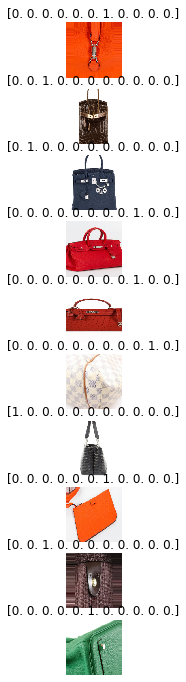

In [7]:
print(train_generator.class_indices)
plots(imgs, titles=labels)

In [8]:
model = Sequential([Conv2D(128, (3, 3), activation='relu', 
                           input_shape=(img_rows, img_cols, 3)), 
                    Flatten(), 
                    Dense(11, activation='softmax')
                   ])


In [9]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(img_rows,img_cols,3)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))

In [10]:
# train_shape = (img_rows, img_cols, 3)
# # print(train_shape)
# model = Sequential()
# model.add(BatchNormalization(input_shape=train_shape))
# model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu',padding= 'same'))
# model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu'))
# model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(Dropout(0.4))

# model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu', padding='same'))
# model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu'))
# model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(Dropout(0.3))

# model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu', padding='same'))
# model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
# model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(Dropout(0.3))

# model.add(Flatten())
# model.add(Dropout(0.5))
# # model.add(Dense(11, activation='sigmoid'))
# model.add(Dense(11, activation='softmax'))


In [11]:
# import keras
# vgg16_model = keras.applications.vgg16.VGG16()
# vgg16_model.summary()
# type(vgg16_model)
# model = Sequential()
# for layer in vgg16_model.layers:
#     model.add(layer)
# model.summary()
# model.layers.pop()
# for layer in model.layers:
#     layer.trainable = False
# model.add(Dense(11, activation='softmax'))
# model.summary()

In [12]:
# model.compile(Adam(lr=.0001), loss='categorical_crossentropy')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=20, validation_data=valid_generator, validation_steps=4, epochs=25)


Epoch 1/25
20/20 [==============================] - 56s 3s/step - loss: 42465.0766 - accuracy: 0.2500 - val_loss: 1577.2021 - val_accuracy: 0.5750
Epoch 2/25
20/20 [==============================] - 48s 2s/step - loss: 1291.0603 - accuracy: 0.5612 - val_loss: 81.5316 - val_accuracy: 0.4750
Epoch 3/25
20/20 [==============================] - 38s 2s/step - loss: 185.4095 - accuracy: 0.5900 - val_loss: 0.5022 - val_accuracy: 0.6750
Epoch 4/25
20/20 [==============================] - 54s 3s/step - loss: 88.8275 - accuracy: 0.6750 - val_loss: 48.7549 - val_accuracy: 0.3500
Epoch 5/25
20/20 [==============================] - 44s 2s/step - loss: 48.3242 - accuracy: 0.6531 - val_loss: 72.4779 - val_accuracy: 0.5750
Epoch 6/25
20/20 [==============================] - 45s 2s/step - loss: 120.3654 - accuracy: 0.6950 - val_loss: 246.2489 - val_accuracy: 0.7750
Epoch 7/25
20/20 [==============================] - 65s 3s/step - loss: 34.7939 - accuracy: 0.7347 - val_loss: 41.4612 - val_accuracy: 0.7

In [ ]:
model.summary()


In [ ]:
test_score = model.evaluate_generator(test_generator, batch_size)
# print(test_score)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

In [ ]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)



Confusion Matrix
Normalized confusion matrix


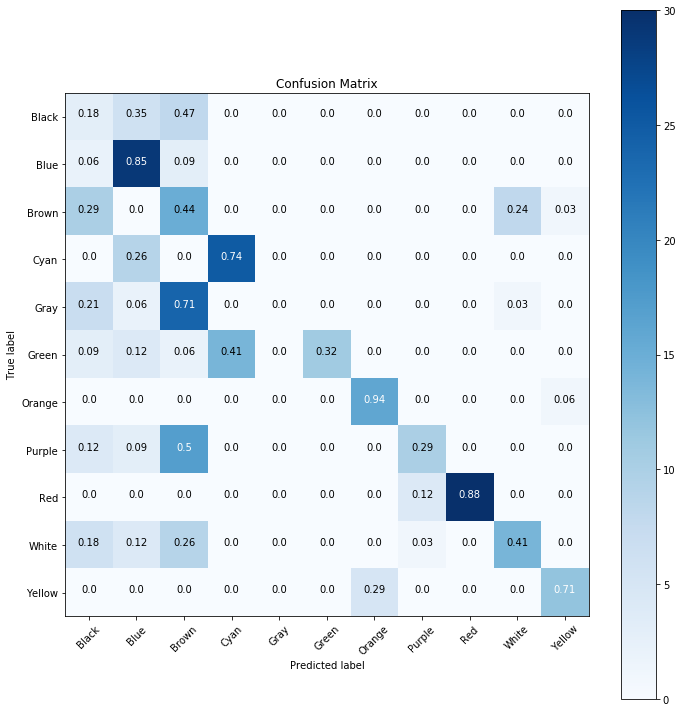

In [30]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [31]:
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Black       0.09      0.18      0.12        17
        Blue       0.51      0.85      0.64        34
       Brown       0.19      0.44      0.27        34
        Cyan       0.64      0.74      0.68        34
        Gray       0.00      0.00      0.00        34
       Green       1.00      0.32      0.49        34
      Orange       0.76      0.94      0.84        17
      Purple       0.67      0.29      0.41        34
         Red       1.00      0.88      0.94        34
       White       0.61      0.41      0.49        34
      Yellow       0.86      0.71      0.77        17

    accuracy                           0.51       323
   macro avg       0.57      0.52      0.51       323
weighted avg       0.58      0.51      0.50       323



/home/amar/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
